<a href="https://colab.research.google.com/github/Moxa13patel/task-6-knn/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing required librabries


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


##adding file

In [18]:
df=pd.read_csv("/content/Iris.csv")
df.head()



# Split features and labels
X = df.drop(columns=['Species'])
y = df['Species']

In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###cleaing the data(already cleaned)

In [10]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


###train split data



In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###normalize


In [45]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select only the first two features for visualization purposes
X_train_2features = X_train_scaled[:, :2]
X_test_2features = X_test_scaled[:, :2]

###Try different values of K

In [46]:
print("KNN Accuracy with different K values:\n")
for k in range(1, 11):  # K from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2features, y_train)  # Use 2 features for training
    y_pred = knn.predict(X_test_2features) # Use 2 features for testing
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc:.2f}")

KNN Accuracy with different K values:

K = 1: Accuracy = 1.00
K = 2: Accuracy = 1.00
K = 3: Accuracy = 1.00
K = 4: Accuracy = 1.00
K = 5: Accuracy = 1.00
K = 6: Accuracy = 1.00
K = 7: Accuracy = 1.00
K = 8: Accuracy = 1.00
K = 9: Accuracy = 1.00
K = 10: Accuracy = 1.00


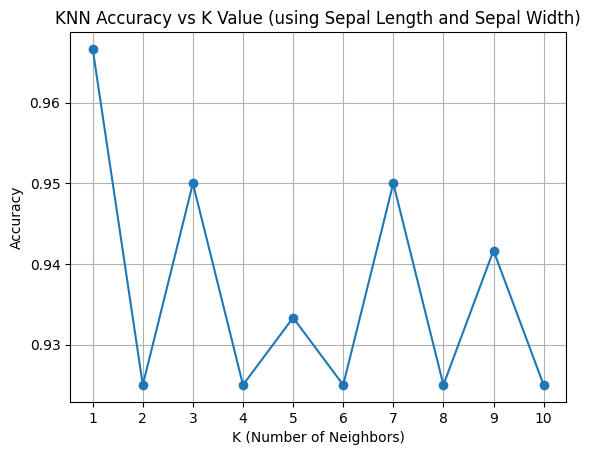

In [47]:
# Try different values of K and store accuracy
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 2 features for cross-validation as well
    scores = cross_val_score(knn, X_train_2features, y_train, cv=5)
    accuracies.append(scores.mean())


# Plot accuracy vs K
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs K Value (using Sepal Length and Sepal Width)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Best value of k


In [48]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best k based on cross-validation (using Sepal Length and Sepal Width): {best_k}")

Best k based on cross-validation (using Sepal Length and Sepal Width): 1


###train knn model

In [49]:
# Train KNN model with the best K using the first two features
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_2features, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
# Predict and evaluate using the two features
y_pred = knn.predict(X_test_2features)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy (using Sepal Length and Sepal Width):", accuracy)
print("Confusion Matrix (using Sepal Length and Sepal Width):\n", cm)

Accuracy (using Sepal Length and Sepal Width): 1.0
Confusion Matrix (using Sepal Length and Sepal Width):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


###Visualize decision boundaries.

In [54]:
feature1 = 2  # Petal Length
feature2 = 3  # Petal Width
X_vis = X_scaled[:, [feature1, feature2]]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=1)

In [55]:

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_labels = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
le = LabelEncoder()
Z_numeric = le.fit_transform(Z_labels)
Z = Z_numeric.reshape(xx.shape)


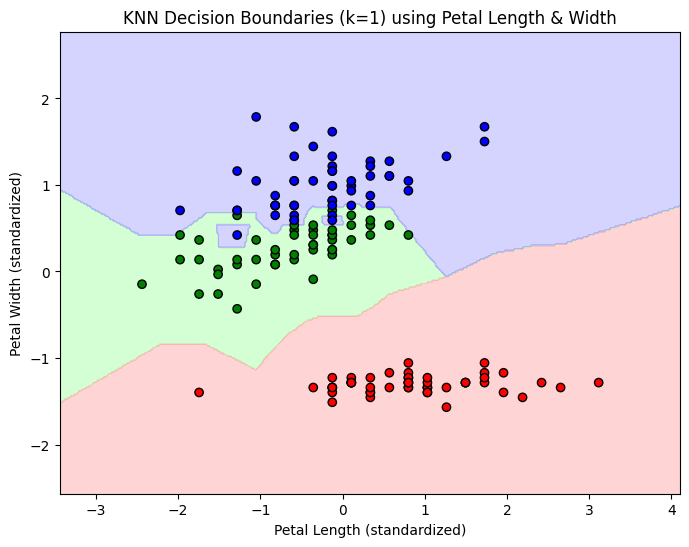

In [58]:
plt.figure(figsize=(8, 6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], edgecolor='k',
            cmap=ListedColormap(['red', 'green', 'blue']))
plt.title(f'KNN Decision Boundaries (k={best_k}) using Petal Length & Width')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()